Importing Libraries

In [2]:

import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
%matplotlib inline
sns.set_style('darkgrid')

In [4]:
#Get current working directory
current = os.getcwd()
current


'F:\\squadstack challenge'

Reading the Data

In [5]:
#Read the csv file
df_cp = pd.read_csv('dataset/agent_followup_data.csv')
df_cp.head()

,id,followup_date,lead_created_at,leadId,followup_type,agentId,additional_data
0,1,2020-03-05 14:38:54,2019-11-04 16:12:00-05:00,20293,calls,10,"{'duration': 0, 'is_incoming': False}"
1,2,2020-03-05 14:38:55,2019-11-04 16:12:00-05:00,20293,calls,10,"{'duration': 0, 'is_incoming': False}"
2,3,2020-01-06 19:11:39,2019-12-26 08:30:32-05:00,49122,calls,4,"{'duration': 91, 'is_incoming': False}"
3,4,2020-08-31 13:12:53,2020-08-30 19:39:18-04:00,58040,calls,9,"{'duration': 0, 'is_incoming': False}"
4,5,2020-10-14 14:47:23,2017-01-28 11:04:00-05:00,36567,calls,9,"{'duration': 0, 'is_incoming': False}"


In [6]:
#Creating a copy of the file so that if any wrong changes are done, can roll back to the original data
df = df_cp.copy()

In [7]:
df.shape

(68354, 7)

In [8]:
#Check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68354 entries, 0 to 68353
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               68354 non-null  int64 
 1   followup_date    68354 non-null  object
 2   lead_created_at  68354 non-null  object
 3   leadId           68354 non-null  int64 
 4   followup_type    68354 non-null  object
 5   agentId          68354 non-null  int64 
 6   additional_data  68354 non-null  object
dtypes: int64(3), object(4)
memory usage: 3.7+ MB


Important to check if any null values are present.


In [9]:
df.isnull().sum()

id                 0
followup_date      0
lead_created_at    0
leadId             0
followup_type      0
agentId            0
additional_data    0
dtype: int64

Dataset has no null values thus can proceed with data wrangling.

## No. of Follow ups for each AgentID

In [10]:
#Count the number of follow ups for each AgentID
ag_follow_ups = df['agentId'].value_counts()
ag_follow_ups

4     15290
10    11655
5     11241
9      9281
7      7819
6      5606
2      4086
8      2732
3       529
0       115
Name: agentId, dtype: int64

In [11]:
pwd = os.getcwd()
pwd

'F:\\squadstack challenge'

In [12]:
os.listdir()


['.git',
 '.ipynb_checkpoints',
 'Agent Insights -Solution.ipynb',
 'dataset',
 'Distribution of Delay in Follow up.png',
 'Distribution of Followup Type each Agent.png',
 'Median delay in follow up per agent.png',
 'Number of Distinct Leads each Agent.png',
 'Number of Follow ups each Agent.png',
 'Percentage of Follow Ups.png',
 'Problem Statement.docx',
 'Total number of times an Agent gets a call from a lead.png']

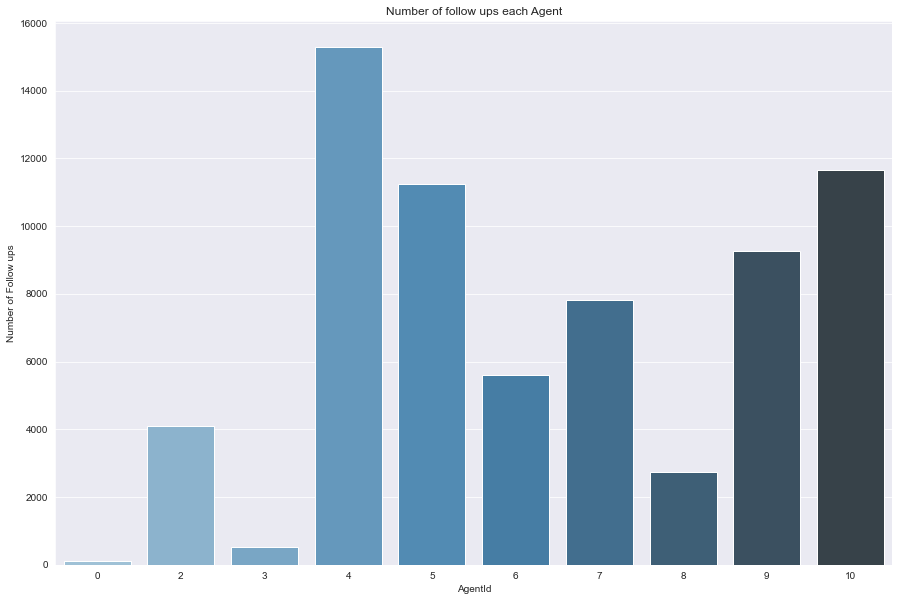

In [15]:
#Graphical representation for Count of followups by each agent. 
plt.figure(figsize=(15,10))
ag_plot = sns.countplot(x = df['agentId'], palette='Blues_d')
ag_plot.set_title('Number of follow ups each Agent')
ag_plot.set_xlabel('AgentId')
ag_plot.set_ylabel('Number of Follow ups')
plt.savefig('Number of Follow ups each Agent.png')


In [16]:
#Another way to represent this would be in percentage i.e. percentage of all followups done by each agent. 
follow_ups_per = (df['agentId'].value_counts(normalize = True)*100).round(2)
follow_ups_per

4     22.37
10    17.05
5     16.45
9     13.58
7     11.44
6      8.20
2      5.98
8      4.00
3      0.77
0      0.17
Name: agentId, dtype: float64

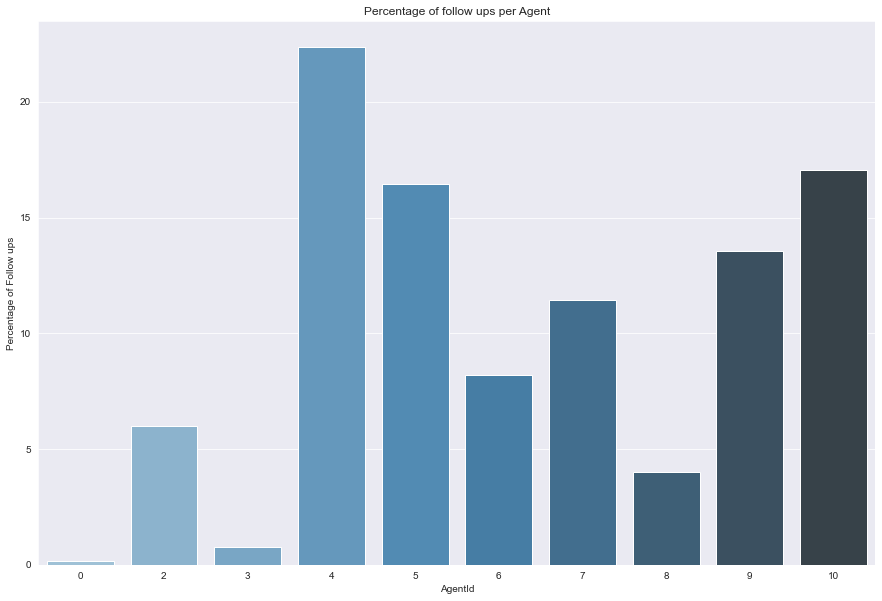

In [17]:
plt.figure(figsize=(15,10))
ag_plot = sns.barplot(x = follow_ups_per.index, y = follow_ups_per.values, palette='Blues_d')
ag_plot.set_title('Percentage of follow ups per Agent')
ag_plot.set_xlabel('AgentId')
ag_plot.set_ylabel('Percentage of Follow ups')
plt.savefig('Percentage of Follow Ups.png')



## Number of Distinct Leads per Agent

In [18]:
# number of leads per agentID. That could be a good indicator of the agent performance. 
leads_per_agent = df.groupby('agentId')['leadId'].nunique()   #split the data into groups based on some criteria
leads_per_agent

agentId
0        5
2      874
3      343
4     1599
5      398
6      351
7      364
8      568
9      876
10    1425
Name: leadId, dtype: int64

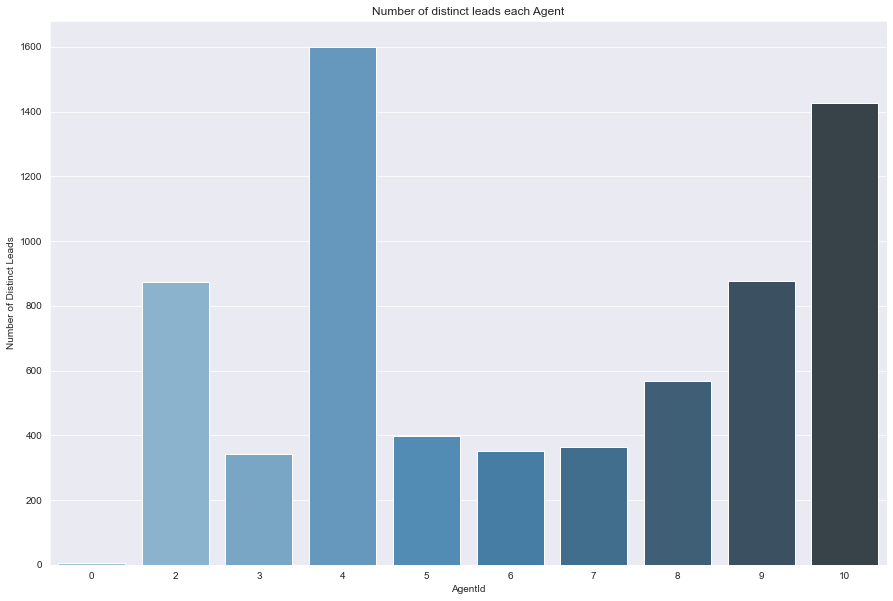

In [19]:
plt.figure(figsize=(15,10))
ax_plot = sns.barplot(x = leads_per_agent.index, y = leads_per_agent.values, palette='Blues_d')
ax_plot.set_title('Number of distinct leads each Agent')
ax_plot.set_xlabel('AgentId')
ax_plot.set_ylabel('Number of Distinct Leads')
plt.savefig( 'Number of Distinct Leads each Agent.png')


## Follow up Type (Calls email or text) broken down by each Agent

In [20]:
calls = df[df['followup_type'] == 'calls']
emails = df[df['followup_type'] == 'emails']
texts = df[df['followup_type'] == 'textmessages']
texts_cnt = texts.groupby('agentId')['id'].count()
calls_cnt = calls.groupby('agentId')['id'].count()
emails_cnt = emails.groupby('agentId')['id'].count()


In [21]:

cnt_df = pd.DataFrame({'Calls' : calls_cnt, 'Texts':texts_cnt, 'Emails':emails_cnt})
cnt_df.head()

,Calls,Texts,Emails
agentId,,,
0,NaN,115,NaN
2,65.0,315,3706.0
3,NaN,13,516.0
4,1087.0,7063,7140.0
5,6.0,170,11065.0


In [22]:
cnt_df.fillna(0, inplace=True)
cnt_df

,Calls,Texts,Emails
agentId,,,
0,0.0,115,0.0
2,65.0,315,3706.0
3,0.0,13,516.0
4,1087.0,7063,7140.0
5,6.0,170,11065.0
6,210.0,3140,2256.0
7,183.0,2429,5207.0
8,293.0,494,1945.0
9,814.0,1175,7292.0


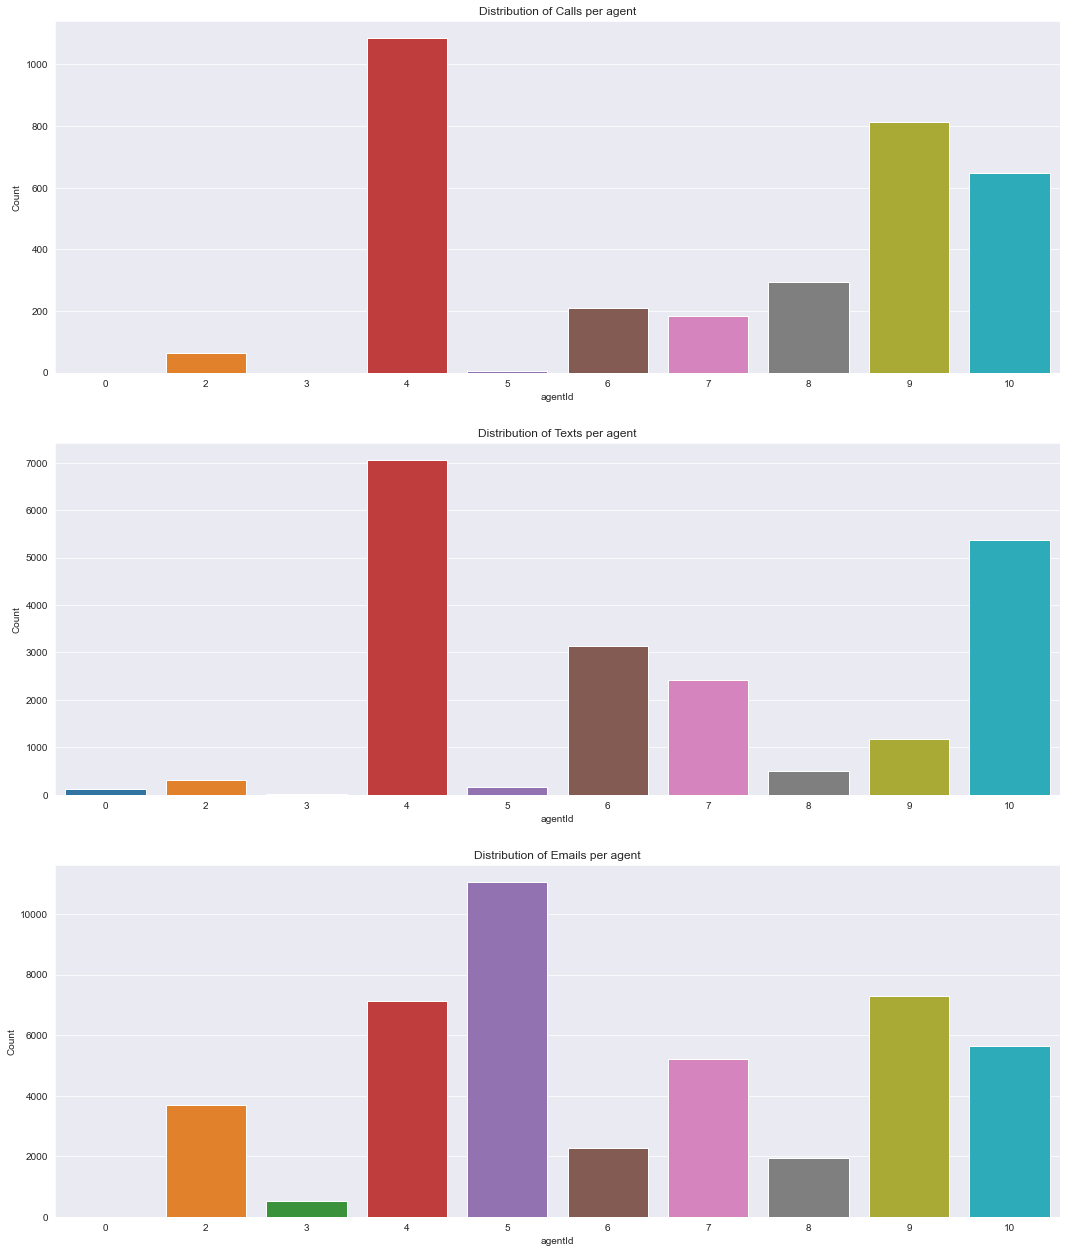

In [23]:
fig, axes = plt.subplots(3, 1, figsize = (18, 22))
for name, ax in zip(['Calls', 'Texts', 'Emails'], axes):
    sns.barplot(x = cnt_df.index, y = cnt_df[name], ax = ax)
    ax.set_ylabel('Count')
    ax.set_title('Distribution of ' + str(name) + ' per agent')
plt.savefig( 'Representation of Followup Type each Agent.png')


## Delay in Following up


In [24]:
#followup_date and lead_created_at are both datetime strings. First, converting them and extracting insights from it so that we can subtract the values and get a column which shows the delay in following up.
df.head()

,id,followup_date,lead_created_at,leadId,followup_type,agentId,additional_data
0,1,2020-03-05 14:38:54,2019-11-04 16:12:00-05:00,20293,calls,10,"{'duration': 0, 'is_incoming': False}"
1,2,2020-03-05 14:38:55,2019-11-04 16:12:00-05:00,20293,calls,10,"{'duration': 0, 'is_incoming': False}"
2,3,2020-01-06 19:11:39,2019-12-26 08:30:32-05:00,49122,calls,4,"{'duration': 91, 'is_incoming': False}"
3,4,2020-08-31 13:12:53,2020-08-30 19:39:18-04:00,58040,calls,9,"{'duration': 0, 'is_incoming': False}"
4,5,2020-10-14 14:47:23,2017-01-28 11:04:00-05:00,36567,calls,9,"{'duration': 0, 'is_incoming': False}"


 Here, finding the difference between creation of lead and the followup time for each lead by subtracting the lead_created_at from followup_date. This gives us an idea on how much average time an agent takes to follow up on their lead.


In [25]:
df['followup_date'] = pd.to_datetime(df['followup_date'])
df['followup_date'] = df['followup_date'].dt.date
df['lead_created_at'] = pd.to_datetime(df['lead_created_at'], utc=True) #UTC = True because tz information in the column
df['lead_created_at'] = df['lead_created_at'].dt.date

Here, since we are dealing in number of days, havekept the Date part in the datetime columns.


In [26]:
df.head()

,id,followup_date,lead_created_at,leadId,followup_type,agentId,additional_data
0,1,2020-03-05,2019-11-04,20293,calls,10,"{'duration': 0, 'is_incoming': False}"
1,2,2020-03-05,2019-11-04,20293,calls,10,"{'duration': 0, 'is_incoming': False}"
2,3,2020-01-06,2019-12-26,49122,calls,4,"{'duration': 91, 'is_incoming': False}"
3,4,2020-08-31,2020-08-30,58040,calls,9,"{'duration': 0, 'is_incoming': False}"
4,5,2020-10-14,2017-01-28,36567,calls,9,"{'duration': 0, 'is_incoming': False}"


In [27]:
#Timedelta[ns]
df['follow_up_delay (days)'] = (df['followup_date'] - df['lead_created_at']).dt.days
df.head()

,id,followup_date,lead_created_at,leadId,followup_type,agentId,additional_data,follow_up_delay (days)
0,1,2020-03-05,2019-11-04,20293,calls,10,"{'duration': 0, 'is_incoming': False}",122
1,2,2020-03-05,2019-11-04,20293,calls,10,"{'duration': 0, 'is_incoming': False}",122
2,3,2020-01-06,2019-12-26,49122,calls,4,"{'duration': 91, 'is_incoming': False}",11
3,4,2020-08-31,2020-08-30,58040,calls,9,"{'duration': 0, 'is_incoming': False}",1
4,5,2020-10-14,2017-01-28,36567,calls,9,"{'duration': 0, 'is_incoming': False}",1355


agentId
0      60.0
2      25.0
3     392.0
4     283.5
5       8.0
6      26.0
7     410.0
8      25.0
9      66.0
10    166.0
Name: follow_up_delay (days), dtype: float64

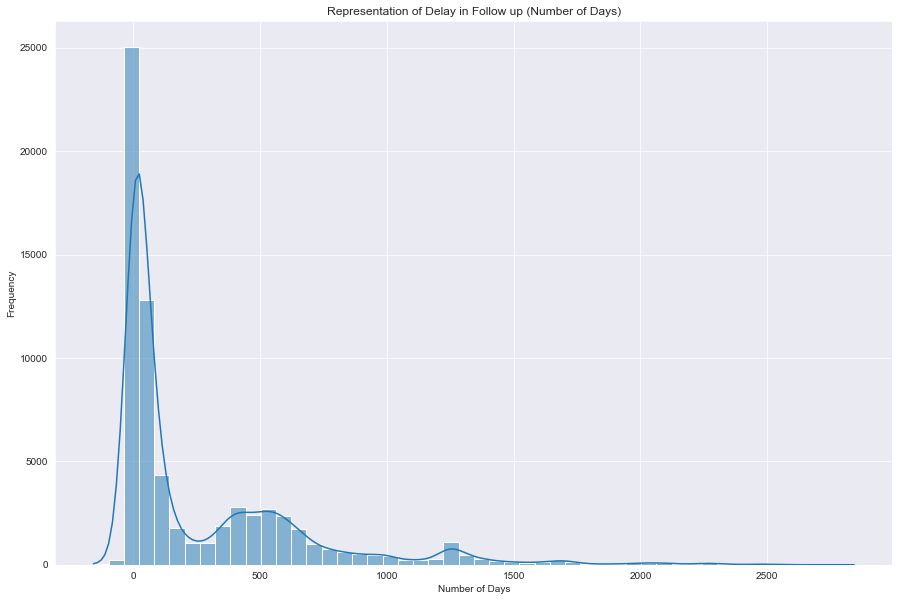

In [28]:
#Distribution to see if follow_up_delay is a normal distribution or not. 
plt.figure(figsize=(15, 10))
ag_plot = sns.histplot(x = df['follow_up_delay (days)'], bins = 50, kde=True)
ag_plot.set_title('Representation of Delay in Follow up (Number of Days)')
ag_plot.set_xlabel('Number of Days')
ag_plot.set_ylabel('Frequency')
plt.savefig('Representation of Delay in Follow up.png')
#Highly right skewed data. Thus median a better indicator.
delay_per_agent = df.groupby('agentId')['follow_up_delay (days)'].median()
delay_per_agent

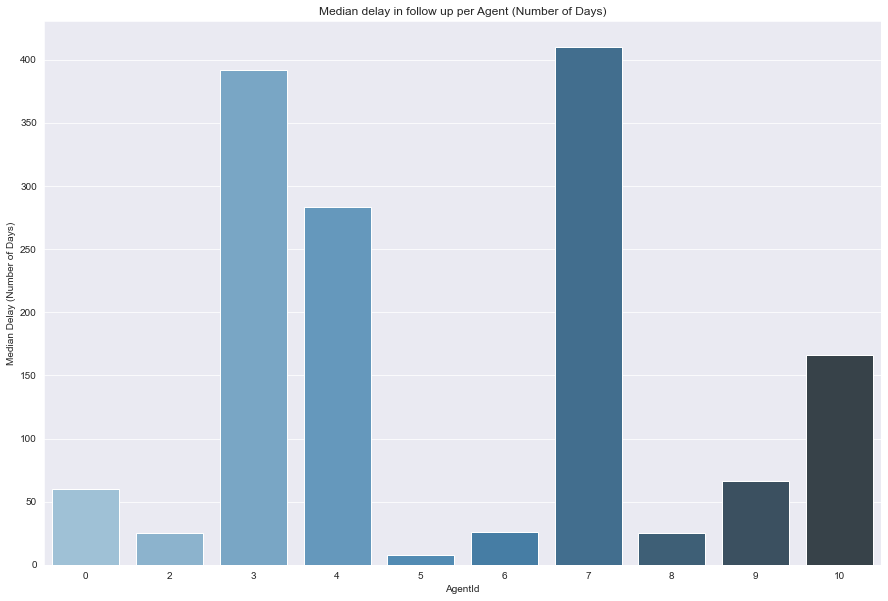

In [29]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x = delay_per_agent.index, y = delay_per_agent.values, palette='Blues_d')
ax.set_title('Median delay in follow up per Agent (Number of Days)')
ax.set_xlabel('AgentId')
ax.set_ylabel('Median Delay (Number of Days)')
plt.savefig('Median delay in follow up per agent.png')

# Useful information in additional_data

In [30]:
df.head()

,id,followup_date,lead_created_at,leadId,followup_type,agentId,additional_data,follow_up_delay (days)
0,1,2020-03-05,2019-11-04,20293,calls,10,"{'duration': 0, 'is_incoming': False}",122
1,2,2020-03-05,2019-11-04,20293,calls,10,"{'duration': 0, 'is_incoming': False}",122
2,3,2020-01-06,2019-12-26,49122,calls,4,"{'duration': 91, 'is_incoming': False}",11
3,4,2020-08-31,2020-08-30,58040,calls,9,"{'duration': 0, 'is_incoming': False}",1
4,5,2020-10-14,2017-01-28,36567,calls,9,"{'duration': 0, 'is_incoming': False}",1355


In [31]:
#Convert the string to dictionary and then expand into 2 new columns named Duration and isIncoming
df[['duration', 'isIncoming']] = df['additional_data'].map(eval).apply(pd.Series)
df.drop(columns = 'additional_data', inplace = True)
df.head()

,id,followup_date,lead_created_at,leadId,followup_type,agentId,follow_up_delay (days),duration,isIncoming
0,1,2020-03-05,2019-11-04,20293,calls,10,122,0.0,False
1,2,2020-03-05,2019-11-04,20293,calls,10,122,0.0,False
2,3,2020-01-06,2019-12-26,49122,calls,4,11,91.0,False
3,4,2020-08-31,2020-08-30,58040,calls,9,1,0.0,False
4,5,2020-10-14,2017-01-28,36567,calls,9,1355,0.0,False


In [32]:
df['duration'].isnull().sum() / len(df['duration']) * 100

95.16487696404015

In [33]:
df['duration'].fillna(0, inplace = True)

Since, 65000 (95%) rows in Duration columns are Null, it is okay to remove duration from our analysis as it wouldnot contribute much to the analysis.


In [34]:
df = df.drop(columns = 'duration')

 If agent calls their leads then isIncoming = 0 else 1

In [35]:
df['isIncoming'] = df['isIncoming'].astype(float)
df.head()

,id,followup_date,lead_created_at,leadId,followup_type,agentId,follow_up_delay (days),isIncoming
0,1,2020-03-05,2019-11-04,20293,calls,10,122,0.0
1,2,2020-03-05,2019-11-04,20293,calls,10,122,0.0
2,3,2020-01-06,2019-12-26,49122,calls,4,11,0.0
3,4,2020-08-31,2020-08-30,58040,calls,9,1,0.0
4,5,2020-10-14,2017-01-28,36567,calls,9,1355,0.0


In [36]:
calls_to_leads = df.groupby('agentId')['isIncoming'].sum()
calls_to_leads

agentId
0      115.0
2      341.0
3       24.0
4     3405.0
5      133.0
6     2257.0
7     4711.0
8      160.0
9     2215.0
10    3780.0
Name: isIncoming, dtype: float64

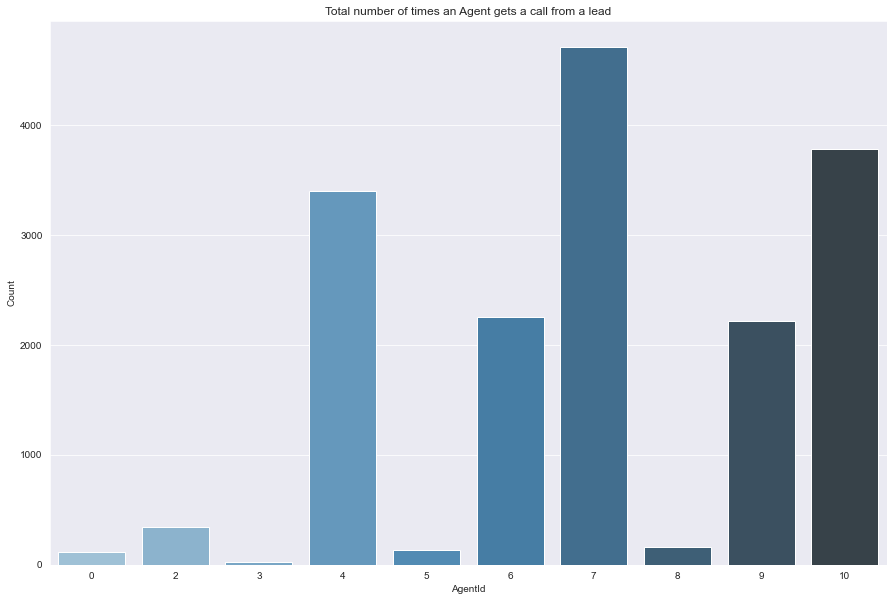

In [37]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x = calls_to_leads.index, y = calls_to_leads.values, palette='Blues_d')
ax.set_title('Total number of times an Agent gets a call from a lead')
ax.set_xlabel('AgentId')
ax.set_ylabel('Count')
plt.savefig('Total number of times an Agent gets a call from a lead.png')

# Ranking the Agents
Now, we have many different variables on which we can calculate an agents performance. The most basic algorithm would be to rank each agent based on a criteria and give them a score so doing this for all such variables and getting the top 4 agents based on highest score achieved.


In [38]:
df.head()

,id,followup_date,lead_created_at,leadId,followup_type,agentId,follow_up_delay (days),isIncoming
0,1,2020-03-05,2019-11-04,20293,calls,10,122,0.0
1,2,2020-03-05,2019-11-04,20293,calls,10,122,0.0
2,3,2020-01-06,2019-12-26,49122,calls,4,11,0.0
3,4,2020-08-31,2020-08-30,58040,calls,9,1,0.0
4,5,2020-10-14,2017-01-28,36567,calls,9,1355,0.0


In [39]:
ranking_agents = ag_follow_ups.rank()
ranking_agents

4     10.0
10     9.0
5      8.0
9      7.0
7      6.0
6      5.0
2      4.0
8      3.0
3      2.0
0      1.0
Name: agentId, dtype: float64

In [40]:
rank_leads_per_agent = leads_per_agent.sort_values(ascending = False).rank()
rank_leads_per_agent

agentId
4     10.0
10     9.0
9      8.0
2      7.0
8      6.0
5      5.0
7      4.0
6      3.0
3      2.0
0      1.0
Name: leadId, dtype: float64

In [41]:
rank_median_delay = delay_per_agent.sort_values().rank(method = 'first', ascending = False)
rank_median_delay

agentId
5     10.0
2      8.0
8      9.0
6      7.0
0      6.0
9      5.0
10     4.0
4      3.0
3      2.0
7      1.0
Name: follow_up_delay (days), dtype: float64

In [42]:
rank_agent_incoming_calls = calls_to_leads.sort_values(ascending=False).rank()
rank_agent_incoming_calls

agentId
7     10.0
10     9.0
4      8.0
6      7.0
9      6.0
2      5.0
8      4.0
5      3.0
0      2.0
3      1.0
Name: isIncoming, dtype: float64

In [47]:
mapping = cnt_df.copy()
mapping['total'] = mapping.apply(lambda x : (x['Calls']*3 + x['Texts']*2 + x['Emails']*1), axis = 1)
mapping['total']

agentId
0       230.0
2      4531.0
3       542.0
4     24527.0
5     11423.0
6      9166.0
7     10614.0
8      3812.0
9     12084.0
10    18327.0
Name: total, dtype: float64

In [48]:
rank_followup_type = mapping['total'].sort_values(ascending=False).rank()
rank_followup_type

agentId
4     10.0
10     9.0
9      8.0
5      7.0
7      6.0
6      5.0
2      4.0
8      3.0
3      2.0
0      1.0
Name: total, dtype: float64

In [50]:
ranks = pd.DataFrame({'Number of Follow Ups': ranking_agents, 'Number of Leads': rank_leads_per_agent, 'Median Delay': rank_median_delay, 'Incoming Calls': rank_agent_incoming_calls, 'Total of Calls/Mails/Texts': rank_followup_type})
ranks

,Number of Follow Ups,Number of Leads,Median Delay,Incoming Calls,Total of Calls/Mails/Texts
0,1.0,1.0,6.0,2.0,1.0
2,4.0,7.0,8.0,5.0,4.0
3,2.0,2.0,2.0,1.0,2.0
4,10.0,10.0,3.0,8.0,10.0
5,8.0,5.0,10.0,3.0,7.0
6,5.0,3.0,7.0,7.0,5.0
7,6.0,4.0,1.0,10.0,6.0
8,3.0,6.0,9.0,4.0,3.0
9,7.0,8.0,5.0,6.0,8.0
10,9.0,9.0,4.0,9.0,9.0


In [51]:
ranks.index.name = 'AgentID'
ranks

,Number of Follow Ups,Number of Leads,Median Delay,Incoming Calls,Total of Calls/Mails/Texts
AgentID,,,,,
0,1.0,1.0,6.0,2.0,1.0
2,4.0,7.0,8.0,5.0,4.0
3,2.0,2.0,2.0,1.0,2.0
4,10.0,10.0,3.0,8.0,10.0
5,8.0,5.0,10.0,3.0,7.0
6,5.0,3.0,7.0,7.0,5.0
7,6.0,4.0,1.0,10.0,6.0
8,3.0,6.0,9.0,4.0,3.0
9,7.0,8.0,5.0,6.0,8.0


In [52]:
ranks['Total'] = ranks.sum(axis = 1)
ranks.head()

,Number of Follow Ups,Number of Leads,Median Delay,Incoming Calls,Total of Calls/Mails/Texts,Total
AgentID,,,,,,
0,1.0,1.0,6.0,2.0,1.0,11.0
2,4.0,7.0,8.0,5.0,4.0,28.0
3,2.0,2.0,2.0,1.0,2.0,9.0
4,10.0,10.0,3.0,8.0,10.0,41.0
5,8.0,5.0,10.0,3.0,7.0,33.0


In [53]:
ranks = ranks.sort_values('Total', ascending = False)
ranks

,Number of Follow Ups,Number of Leads,Median Delay,Incoming Calls,Total of Calls/Mails/Texts,Total
AgentID,,,,,,
4,10.0,10.0,3.0,8.0,10.0,41.0
10,9.0,9.0,4.0,9.0,9.0,40.0
9,7.0,8.0,5.0,6.0,8.0,34.0
5,8.0,5.0,10.0,3.0,7.0,33.0
2,4.0,7.0,8.0,5.0,4.0,28.0
6,5.0,3.0,7.0,7.0,5.0,27.0
7,6.0,4.0,1.0,10.0,6.0,27.0
8,3.0,6.0,9.0,4.0,3.0,25.0
0,1.0,1.0,6.0,2.0,1.0,11.0


In [56]:

agent4 = ranks['Total'].nlargest(4)
print ('Top 4 Agent IDs :\n' )
for agent in agent4.index:
    print (agent)

 

Top 4 Agent IDs :

4
10
9
5


## Top 4 Agent IDs :

4
10
9
5